In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels import api as sm

In [2]:
# Importing data
data = pd.read_csv('Electric_Production.csv')

In [3]:
data.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [4]:
#Converting to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')

In [5]:
data.tail()

,IPG2211A2N
DATE,
2019-09-01,102.0039
2019-10-01,94.0000
2019-11-01,101.0766
2019-12-01,111.5644
2020-01-01,115.5035


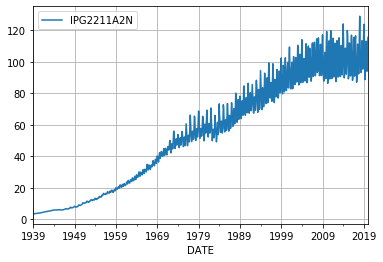

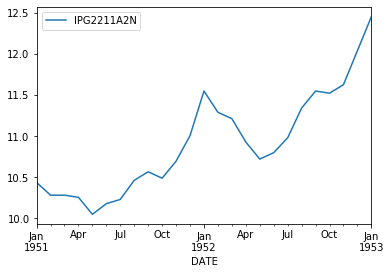

In [6]:
data.plot(grid = True)
startdate = datetime(1951,1,1)
enddate = datetime(1953,1,1)
data[(startdate <=data.index) & (data.index <= enddate)].plot()

<Figure size 1152x432 with 0 Axes>

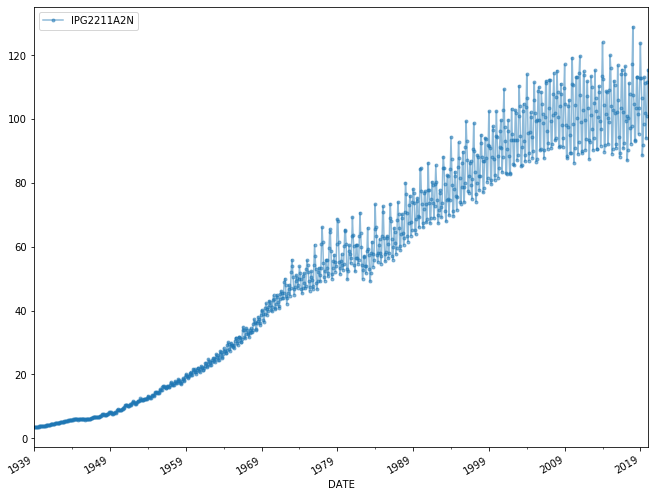

In [19]:
plt.figure(figsize=(16,6))
axes = data.plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)

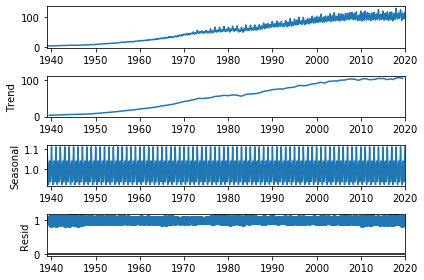

In [8]:
#Decomposition of time-series
decomp = sm.tsa.seasonal_decompose(data, model = 'multiplicative')
fig = decomp.plot()
plt.rcParams['figure.figsize'] = [12.0, 10.0]

In [9]:
#Using Seasonal Arima with grid search
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3857.628, BIC=3881.963, Time=8.560 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4366.166, BIC=4375.900, Time=0.095 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=4200.939, BIC=4220.406, Time=1.239 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3980.624, BIC=4000.092, Time=1.881 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=4364.180, BIC=4369.047, Time=0.076 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=4154.715, BIC=4174.183, Time=1.190 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=3855.715, BIC=3884.916, Time=8.010 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=4039.822, BIC=4064.157, Time=3.219 seconds
Fit ARIMA: (1, 1, 1)x(2, 1, 1, 12) (constant=True); AIC=3823.457, BIC=3857.526, Time=13.579 seconds
Fit ARIMA: (1, 1, 1)x(2, 1, 0, 12) (constant=True); AIC=3907.424

In [10]:
print(stepwise_model.aic())

3804.7662983924283


In [11]:
#Train test split
train = data.loc['1939-01-01':'2009-12-01']
test = data.loc['2010-01-01':]

In [12]:
#len(test)

121

In [13]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [14]:
#Predicting future forecast
future_forecast = stepwise_model.predict(n_periods = 121)
future_forecast

array([115.37437119, 107.83894798,  99.88610928,  89.58355331,
        90.29796592, 100.48532053, 108.39065855, 109.89085101,
        98.06123541,  91.1963504 ,  92.10001663, 109.10630649,
       114.07300809, 108.42330402, 100.21499781,  90.0241924 ,
        90.97645764, 101.75295247, 109.67911263, 111.00216337,
        98.89187003,  91.83414527,  93.04800974, 109.21406646,
       114.45551558, 108.66884021, 100.31933502,  90.22203852,
        90.97135461, 102.07660132, 109.68823613, 110.93904059,
        98.81967272,  91.8798823 ,  93.13710288, 109.69191911,
       115.03535404, 108.69498587, 100.29562694,  90.24455015,
        90.77926421, 102.00112397, 109.36264342, 110.59901878,
        98.53896999,  91.73668288,  92.95419288, 110.01084199,
       115.36865089, 108.62916907, 100.22433539,  90.18708458,
        90.60255679, 101.83740425, 109.07842305, 110.32060503,
        98.3088779 ,  91.58577059,  92.76201592, 110.11764433,
       115.46245524, 108.54298411, 100.14563353,  90.10

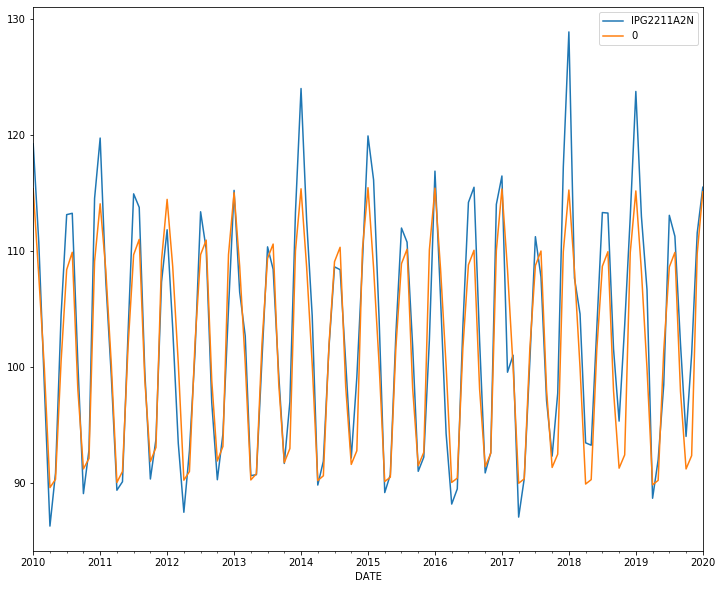

In [15]:
future_forecast = pd.DataFrame(future_forecast,index = test.index)
pd.concat([test,future_forecast],axis=1).plot()

In [16]:
future_forecast.head()

,0
DATE,
2010-01-01,115.374371
2010-02-01,107.838948
2010-03-01,99.886109
2010-04-01,89.583553
2010-05-01,90.297966


In [17]:
test.head()

,IPG2211A2N
DATE,
2010-01-01,119.2473
2010-02-01,110.7525
2010-03-01,98.3430
2010-04-01,86.2612
2010-05-01,90.8459


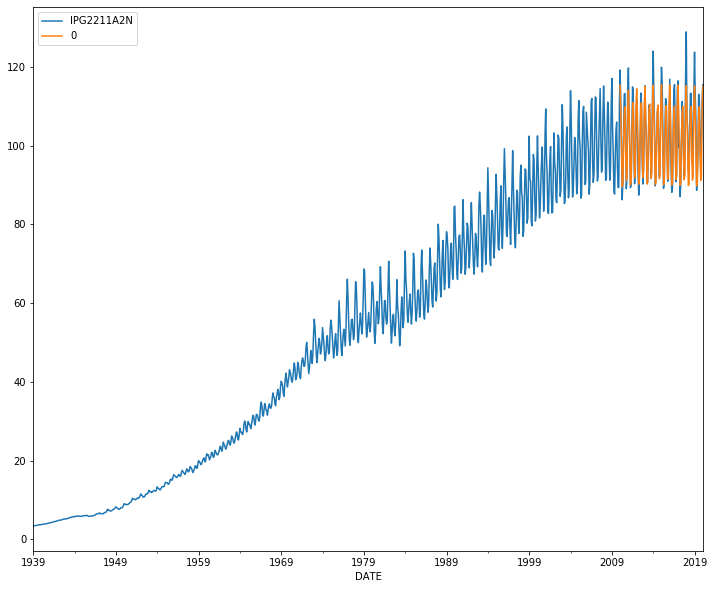

In [18]:
pd.concat([data,future_forecast],axis=1).plot()